In [6]:
# Reading csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import metrics
import seaborn as sns
import seaborn as sn

cal_df = pd.read_csv("diabetes_prediction_dataset.csv")

print (cal_df.describe())

cal_df.isnull().sum()

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Encoding categorical values
gender_le = LabelEncoder()
smoking_history_le = LabelEncoder()

cal_df['gender_encoded'] = gender_le.fit_transform(cal_df['gender'])
cal_df['smoking_history_encoded'] = smoking_history_le.fit_transform(cal_df['smoking_history'])

# Dropping the original categorical columns
cal_df = cal_df.drop(['gender', 'smoking_history'], axis=1)

# Check the DataFrame info to confirm the changes
print(cal_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  float64
 1   hypertension             100000 non-null  int64  
 2   heart_disease            100000 non-null  int64  
 3   bmi                      100000 non-null  float64
 4   HbA1c_level              100000 non-null  float64
 5   blood_glucose_level      100000 non-null  int64  
 6   diabetes                 100000 non-null  int64  
 7   gender_encoded           100000 non-null  int32  
 8   smoking_history_encoded  100000 non-null  int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB
None


In [8]:
# Get column names first, excluding the target variable 'diabetes'
feature_names = cal_df.drop('diabetes', axis=1).columns

# Create the Scaler object
scaler = StandardScaler()

# Fit your data on the scaler object, excluding the target variable
scaled_features = scaler.fit_transform(cal_df.drop('diabetes', axis=1))

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=feature_names)

# Add the 'diabetes' column back into the DataFrame
scaled_df['diabetes'] = cal_df['diabetes']

scaled_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_encoded,smoking_history_encoded,diabetes
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,-0.841047,0.963327,0
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,-0.841047,-1.153468,0
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,1.187234,0.963327,0
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,-0.841047,-0.624269,0
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,1.187234,-0.624269,0


In [9]:
# Our Independent variable
X = scaled_df.drop(['diabetes'], axis=1)

# Our descriptive feature
# print (X.describe())
print (X.info())
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  float64
 1   hypertension             100000 non-null  float64
 2   heart_disease            100000 non-null  float64
 3   bmi                      100000 non-null  float64
 4   HbA1c_level              100000 non-null  float64
 5   blood_glucose_level      100000 non-null  float64
 6   gender_encoded           100000 non-null  float64
 7   smoking_history_encoded  100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB
None
(100000, 8)


In [10]:
# Our target variable
y = scaled_df['diabetes']

print (y.describe())
print (y.shape)

count    100000.000000
mean          0.085000
std           0.278883
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes, dtype: float64
(100000,)


In [11]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 8)
(80000,)
(20000, 8)
(20000,)


In [43]:
# K-Nearest Neighbour (KNN) classification algorithm
def diabetesPrediction(train_features, train_labels, test_features, test_labels, dmetric, w):
    # Create an empty list to store accuracy results
    allResults = []
    
    # Iterate over a range of k values (from 1 to 100)
    for kValue in range(1, 101):
        # Create a KNN classifier with the specified parameters
        knn = neighbors.KNeighborsClassifier(n_neighbors=kValue, metric=dmetric, weights=w)
        
        # Fit the KNN classifier on the training data
        knn = knn.fit(train_features, train_labels)
        
        # Calculate the accuracy on the test data
        accuracy = knn.score(test_features, test_labels)
        
        # Append the accuracy to the results list
        allResults.append(accuracy)
        
        # Print the kValue and corresponding accuracy
        print(kValue, accuracy)

    # Plot the results
    plt.plot(allResults)
    plt.show()

In [44]:
# Extract features and label data
train_features = X_train.values  # Convert X_train DataFrame to a NumPy array
train_labels = y_train.values    # Convert y_train Series to a NumPy array

test_features = X_test.values    # Convert X_test DataFrame to a NumPy array
test_labels = y_test.values      # Convert y_test Series to a NumPy array

1 0.9505
2 0.96225
3 0.96025
4 0.96245
5 0.9611
6 0.9621
7 0.96235
8 0.96205
9 0.9624
10 0.96265
11 0.96335
12 0.9633
13 0.9634
14 0.9632
15 0.96355
16 0.9629
17 0.96335
18 0.9629
19 0.96345
20 0.96285
21 0.96345
22 0.96325
23 0.96325
24 0.9629
25 0.9629
26 0.96285
27 0.9631
28 0.96245
29 0.96285
30 0.96235
31 0.9625
32 0.96225
33 0.9627
34 0.9622
35 0.9624
36 0.96195
37 0.96195
38 0.9617
39 0.96195
40 0.96185
41 0.96215
42 0.96215
43 0.9621
44 0.96185
45 0.9619
46 0.96175
47 0.9619
48 0.96165
49 0.96165
50 0.9615
51 0.9616
52 0.9614
53 0.9613
54 0.9613
55 0.96135
56 0.96115
57 0.96105
58 0.9611
59 0.96115
60 0.96125
61 0.96125
62 0.9611
63 0.96125
64 0.96085
65 0.96105
66 0.9609
67 0.96125
68 0.96085
69 0.96095
70 0.9605
71 0.9606
72 0.9605
73 0.96075
74 0.9608
75 0.96075
76 0.96085
77 0.9608
78 0.9607
79 0.9607
80 0.96075
81 0.96075
82 0.9607
83 0.96065
84 0.96045
85 0.9604
86 0.9604
87 0.9604
88 0.96025
89 0.9602
90 0.96
91 0.96015
92 0.96
93 0.96015
94 0.95985
95 0.96
96 0.9598
97 

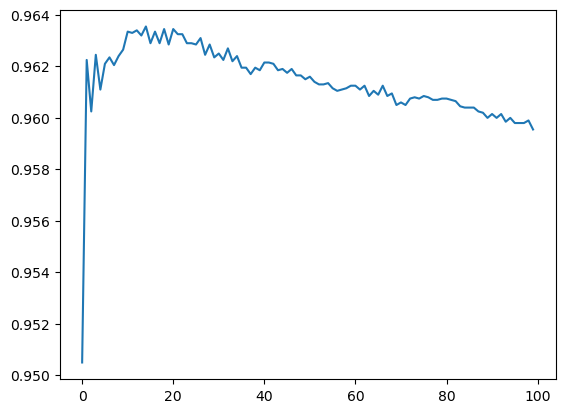

In [45]:
# Uniform Weight and Euclidean distance
# Evaluate the performance of kNN (Takes approx 20 mins)
diabetesPrediction(train_features, train_labels, test_features, test_labels, "euclidean", "uniform")

1 0.94955
2 0.962
3 0.9599
4 0.9621
5 0.9619
6 0.9628
7 0.9636
8 0.9632
9 0.9639
10 0.96265
11 0.9637
12 0.9632
13 0.96365
14 0.96345
15 0.96385
16 0.9632
17 0.9632
18 0.96265
19 0.963
20 0.9625
21 0.9628
22 0.9625
23 0.96305
24 0.9624
25 0.96275
26 0.96235
27 0.9628
28 0.96205
29 0.9626
30 0.9619
31 0.9622
32 0.9617
33 0.96225
34 0.96185
35 0.9623
36 0.96195
37 0.9625
38 0.96175
39 0.96205
40 0.9616
41 0.96175
42 0.9617
43 0.9619
44 0.9617
45 0.96175
46 0.9617
47 0.9616
48 0.96155
49 0.96155
50 0.9615
51 0.96145
52 0.9613
53 0.9614
54 0.96135
55 0.9615
56 0.96125
57 0.9614
58 0.9613
59 0.96145
60 0.961
61 0.96105
62 0.9608
63 0.96085
64 0.9608
65 0.9609
66 0.96075
67 0.96085
68 0.96055
69 0.9608
70 0.9606
71 0.96075
72 0.9604
73 0.96055
74 0.96025
75 0.9603
76 0.96025
77 0.9602
78 0.96
79 0.96035
80 0.96005
81 0.9602
82 0.9598
83 0.96025
84 0.9598
85 0.95995
86 0.9598
87 0.95975
88 0.9595
89 0.95975
90 0.9595
91 0.95955
92 0.95935
93 0.9595
94 0.95925
95 0.9596
96 0.9592
97 0.95945
98

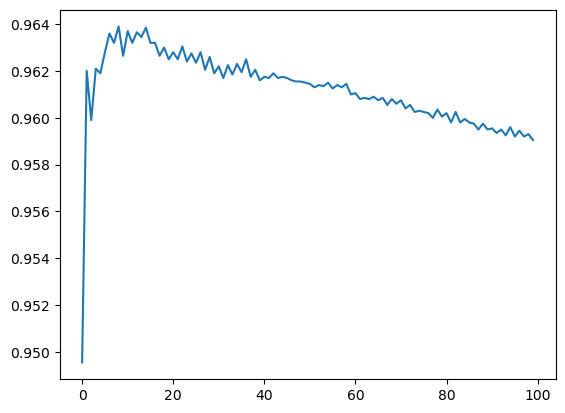

In [46]:
# Uniform Weight and Manhattan distance
# Evaluate the performance of kNN (Takes approx 20 mins)
diabetesPrediction(train_features, train_labels, test_features, test_labels, "manhattan", "uniform")

1 0.9505
2 0.95115
3 0.95855
4 0.95885
5 0.95985
6 0.96045
7 0.961
8 0.9614
9 0.96175
10 0.96195
11 0.9625
12 0.9631
13 0.9629
14 0.96345
15 0.96315
16 0.96305
17 0.9629
18 0.96335
19 0.9633
20 0.9633
21 0.96305
22 0.96325
23 0.963
24 0.96295
25 0.96295
26 0.963
27 0.96265
28 0.96265
29 0.96265
30 0.9627
31 0.96285
32 0.96275
33 0.96285
34 0.9627
35 0.9628
36 0.96245
37 0.96255
38 0.96245
39 0.9623
40 0.9623
41 0.9623
42 0.9622
43 0.96205
44 0.96225
45 0.9619
46 0.96195
47 0.9619
48 0.9617
49 0.9618
50 0.96185
51 0.9617
52 0.96185
53 0.9616
54 0.96175
55 0.96165
56 0.9618
57 0.9614
58 0.9616
59 0.9614
60 0.96175
61 0.9614
62 0.96155
63 0.9614
64 0.96165
65 0.96145
66 0.9615
67 0.96135
68 0.96125
69 0.961
70 0.9613
71 0.9611
72 0.9613
73 0.96105
74 0.9611
75 0.9609
76 0.96105
77 0.961
78 0.96105
79 0.9609
80 0.961
81 0.96075
82 0.96095
83 0.96085
84 0.9609
85 0.96075
86 0.96065
87 0.96065
88 0.9606
89 0.9606
90 0.96055
91 0.96045
92 0.9604
93 0.9606
94 0.96045
95 0.96055
96 0.96055
97 0

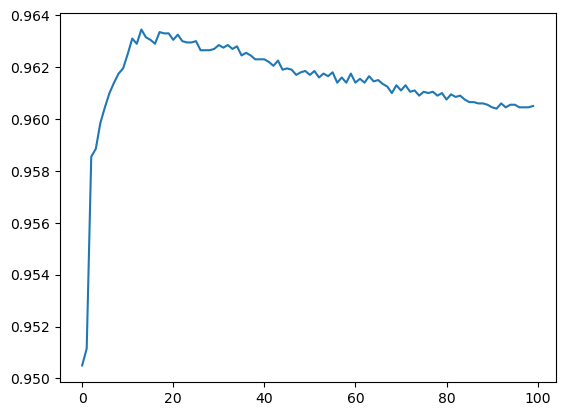

In [47]:
# Distance Weight and Euclidean distance
# Evaluate the performance of kNN (Takes approx 20 mins)
diabetesPrediction(train_features, train_labels, test_features, test_labels, "euclidean", "distance")

1 0.94955
2 0.95025
3 0.95815
4 0.95905
5 0.96015
6 0.96115
7 0.9615
8 0.962
9 0.962
10 0.96205
11 0.96225
12 0.9626
13 0.9629
14 0.9635
15 0.96355
16 0.96325
17 0.963
18 0.9633
19 0.96305
20 0.9628
21 0.9626
22 0.96255
23 0.96275
24 0.9629
25 0.96255
26 0.9628
27 0.9624
28 0.96275
29 0.9623
30 0.9624
31 0.96235
32 0.9621
33 0.9624
34 0.9623
35 0.9624
36 0.96235
37 0.9624
38 0.96235
39 0.96235
40 0.96195
41 0.96205
42 0.96215
43 0.96215
44 0.9621
45 0.96205
46 0.96205
47 0.96195
48 0.962
49 0.96195
50 0.96195
51 0.96185
52 0.9617
53 0.9618
54 0.96185
55 0.96175
56 0.9617
57 0.9617
58 0.96165
59 0.96165
60 0.96165
61 0.96145
62 0.96145
63 0.9614
64 0.9615
65 0.9614
66 0.96145
67 0.9614
68 0.96145
69 0.9614
70 0.9613
71 0.9612
72 0.96115
73 0.96125
74 0.9611
75 0.96115
76 0.96105
77 0.96105
78 0.961
79 0.96105
80 0.961
81 0.961
82 0.961
83 0.961
84 0.9609
85 0.9608
86 0.96075
87 0.9608
88 0.9607
89 0.9607
90 0.96055
91 0.9607
92 0.96055
93 0.9605
94 0.9605
95 0.96035
96 0.96045
97 0.9604

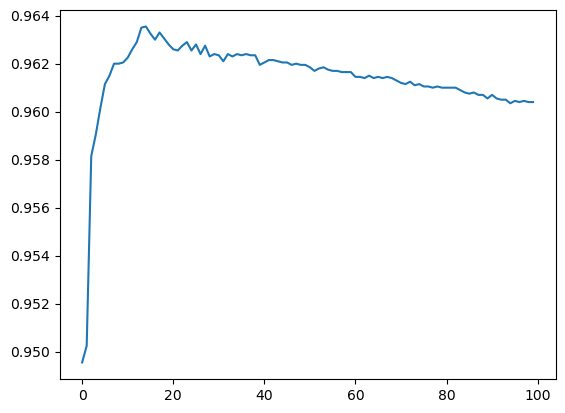

In [48]:
# Distance Weight and Manhattan distance
# Evaluate the performance of kNN (Takes approx 20 mins)
diabetesPrediction(train_features, train_labels, test_features, test_labels, "manhattan", "distance")

Accuracy:  0.9616


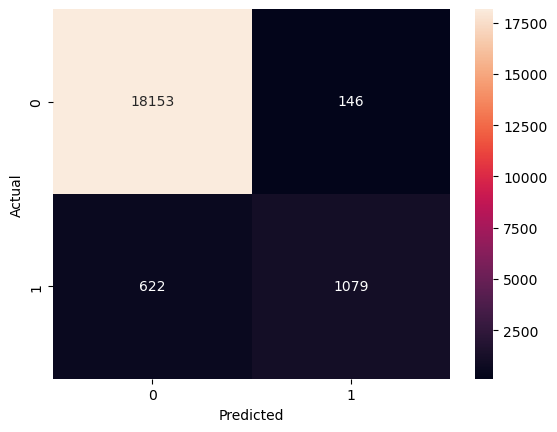

In [12]:
# Logistic Regression algorithm
logisticRegr = LogisticRegression(solver='liblinear')

logisticRegr.fit(X_train, y_train)


predictions = logisticRegr.predict(X_test)

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))
plt.show()